# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [50]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [51]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매액(단위: 1000달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [52]:
data[var].isna().sum()

0

* 결측치 없음

4) 가변수화 필요 여부

* 불필요

5) 기초통계량(수치화)

In [53]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

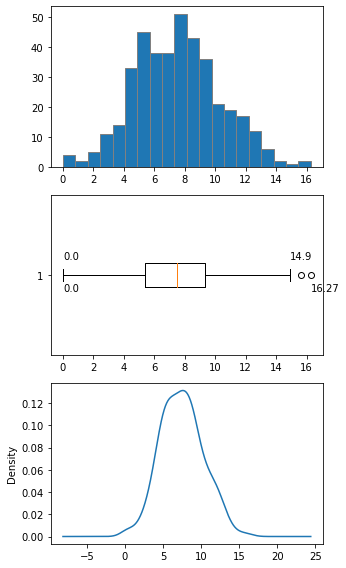

In [54]:
plt.figure(figsize = (5,8))
plt.subplot(3,1,1)
plt.hist(data[var], bins = 20, edgecolor = 'grey')

plt.subplot(3,1,2)
box1 = plt.boxplot(data[var], vert = False)
lower_fence = box1['whiskers'][0].get_xdata()[1]
upper_fense = box1['whiskers'][1].get_xdata()[1]
min_val = data[var].min()
max_val = data[var].max()

plt.text(lower_fence, 1.1, lower_fence)
plt.text(upper_fense, 1.1, upper_fense)

plt.text(min_val, 0.9, min_val)
plt.text(max_val, 0.9, max_val)


plt.subplot(3,1,3)
data[var].plot(kind = 'kde')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 5000, 8000 대에 두 피크에 따른 그룹핑이 되어있는 것처럼 보이나 density graph와 (1 ~ 2), (2 ~ 3)사분위수의 gap이 일정하니 매출액이 4000~9000대에 몰려있다 할 수 있습니다.

8) 추가 분석해 볼 사항이 있나요?

* 4000 ~ 9000 대의 세부 분석
* 높은 매출(14,900 16,270) 지역에 대한 이상치 분석
* 타 x value와의 이변량 분석

### ② CompPrice

In [55]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

* 경쟁사 가격(단위 : 달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [56]:
data[var].isna().sum()

0

* 결측치 없음

4) 가변수화 필요 여부

* 불필요

5) 기초통계량(수치화)

In [57]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

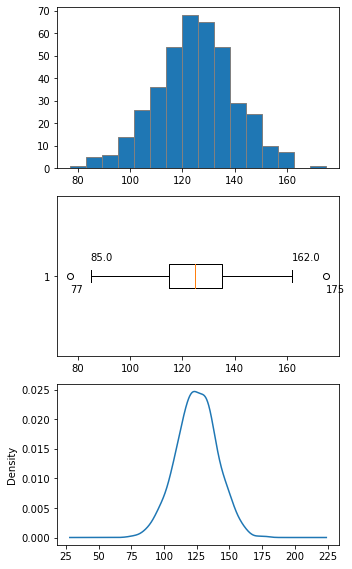

In [58]:
plt.figure(figsize = (5,8))
plt.subplot(3,1,1)
plt.hist(data[var], bins = 16, edgecolor = 'grey')

plt.subplot(3,1,2)
box1 = plt.boxplot(data[var], vert = False)
lower_fence = box1['whiskers'][0].get_xdata()[1]
upper_fense = box1['whiskers'][1].get_xdata()[1]
min_val = data[var].min()
max_val = data[var].max()

plt.text(lower_fence, 1.1, lower_fence)
plt.text(upper_fense, 1.1, upper_fense)

plt.text(min_val, 0.9, min_val)
plt.text(max_val, 0.9, max_val)


plt.subplot(3,1,3)
data[var].plot(kind = 'kde')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 정규 분포와 유사한 분포를 따른다.
* 가격대는 주로 115 ~ 140에 모여있다.
* 77달러, 175달러의 이상치
  => 가성비/ 고급화 제품이 존재한다.

8) 추가 분석해 볼 사항이 있나요?

* 자사 가격과의 비교를 통해 어떤 측면에서 가격 경쟁력이 부족한지 파악
  ex) 경쟁사 가격 범주에 대해 1, 2, 3 분위 간격이 일정하다.
  2 사분위 수와 평균값이 일치한다.
  => 해당 가격 분포가 매출에 이득인지?

### ③ Income

In [59]:
var = 'Income'

1) 변수의 비즈니스 의미

* 지역 평균 소득(단위 : 1000달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [60]:
data[var].isna().sum()

0

* 결측치 없음

4) 가변수화 필요 여부

* 불필요

5) 기초통계량(수치화)

In [61]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

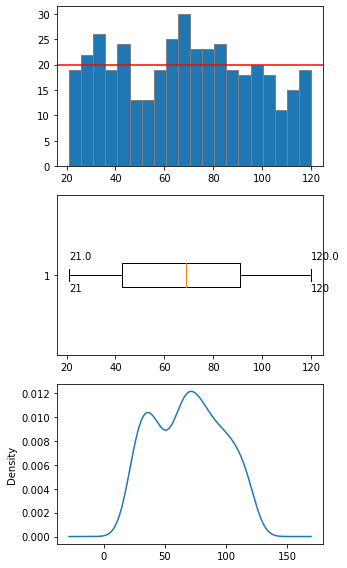

In [62]:
plt.figure(figsize = (5,8))
plt.subplot(3,1,1)
plt.hist(data[var], bins = 20, edgecolor = 'grey')
plt.axhline(data[var].count()/20, color = 'r')

plt.subplot(3,1,2)
box1 = plt.boxplot(data[var], vert = False)
lower_fence = box1['whiskers'][0].get_xdata()[1]
upper_fense = box1['whiskers'][1].get_xdata()[1]
min_val = data[var].min()
max_val = data[var].max()

plt.text(lower_fence, 1.1, lower_fence)
plt.text(upper_fense, 1.1, upper_fense)

plt.text(min_val, 0.9, min_val)
plt.text(max_val, 0.9, max_val)


plt.subplot(3,1,3)
data[var].plot(kind = 'kde')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 고객 분포가 50, 100 부근에서 특히 떨어진다.
  해당 고객층에게 알맞는 상품 라인업이 있는지 확인해야할 것 같다.

8) 추가 분석해 볼 사항이 있나요?

* 0 ~ 50, 50 ~ 100, 100 ~ 120 그룹으로 나누어 분석

### ④ Advertising

In [63]:
var = 'Advertising'

1) 변수의 비즈니스 의미

* 각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [64]:
data[var].isna().sum()

0

* 결측치 없음

4) 가변수화 필요 여부

* 불필요

5) 기초통계량(수치화)

In [65]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

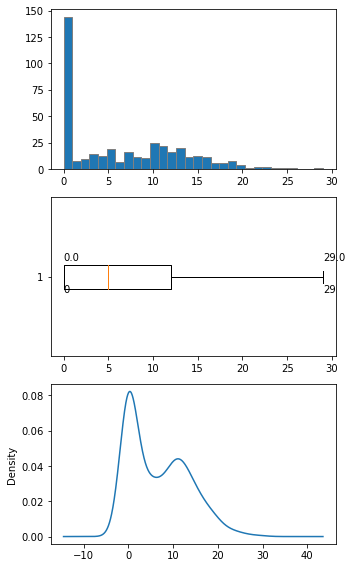

In [66]:
plt.figure(figsize = (5,8))
plt.subplot(3,1,1)
plt.hist(data[var], bins = 30, edgecolor = 'grey')

plt.subplot(3,1,2)
box1 = plt.boxplot(data[var], vert = False)
lower_fence = box1['whiskers'][0].get_xdata()[1]
upper_fense = box1['whiskers'][1].get_xdata()[1]
min_val = data[var].min()
max_val = data[var].max()

plt.text(lower_fence, 1.1, lower_fence)
plt.text(upper_fense, 1.1, upper_fense)

plt.text(min_val, 0.9, min_val)
plt.text(max_val, 0.9, max_val)


plt.subplot(3,1,3)
data[var].plot(kind = 'kde')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 광고예산이 주로 0 부근에 머문다.
* 이후 15000달러 부근에서 정규분포를 띈다.
* 기존 광고 정책은 다수의 저가 광고를 택한 것 같다.
* 적절히 집행된 광고비용을 재산출한다.

8) 추가 분석해 볼 사항이 있나요?

* 15000달러 부근의 분포를 재확인한다.

### ⑤ Population

In [67]:
var = 'Population'

1) 변수의 비즈니스 의미

* 지역 인구수(단위 : 1000명)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [68]:
data[var].isna().sum()

0

* 결측치 없음

4) 가변수화 필요 여부

* 불필요

5) 기초통계량(수치화)

In [69]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

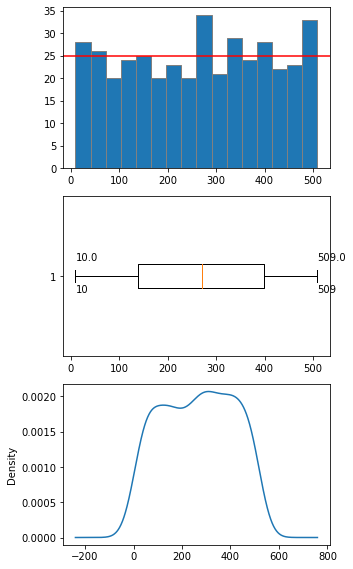

In [70]:
plt.figure(figsize = (5,8))
plt.subplot(3,1,1)
plt.hist(data[var], bins = 16, edgecolor = 'grey')
plt.axhline(data[var].count()/16, color = 'r')

plt.subplot(3,1,2)
box1 = plt.boxplot(data[var], vert = False)
lower_fence = box1['whiskers'][0].get_xdata()[1]
upper_fense = box1['whiskers'][1].get_xdata()[1]
min_val = data[var].min()
max_val = data[var].max()

plt.text(lower_fence, 1.1, lower_fence)
plt.text(upper_fense, 1.1, upper_fense)

plt.text(min_val, 0.9, min_val)
plt.text(max_val, 0.9, max_val)


plt.subplot(3,1,3)
data[var].plot(kind = 'kde')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 평균 부근에서 인구분포를 이룬다.

8) 추가 분석해 볼 사항이 있나요?

### ⑥ Price

In [23]:
var = 'Price'

1) 변수의 비즈니스 의미

* 각 지역별 판매 가격(단위 : 달러..?)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [24]:
data[var].isna().sum()

0

* 결측치 없음

4) 가변수화 필요 여부

* 불필요

5) 기초통계량(수치화)

In [25]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

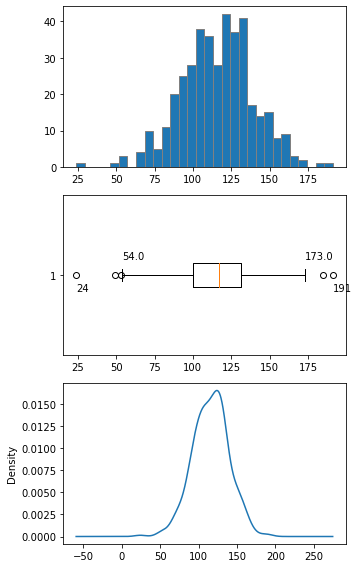

In [26]:
plt.figure(figsize = (5,8))
plt.subplot(3,1,1)
plt.hist(data[var], bins = 30, edgecolor = 'grey')

plt.subplot(3,1,2)
box1 = plt.boxplot(data[var], vert = False)
lower_fence = box1['whiskers'][0].get_xdata()[1]
upper_fense = box1['whiskers'][1].get_xdata()[1]
min_val = data[var].min()
max_val = data[var].max()

plt.text(lower_fence, 1.1, lower_fence)
plt.text(upper_fense, 1.1, upper_fense)

plt.text(min_val, 0.9, min_val)
plt.text(max_val, 0.9, max_val)


plt.subplot(3,1,3)
data[var].plot(kind = 'kde')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 평균가격 범위의 제품들보다 조금 더 비싼 제품(125 부근)의 분포가 더 많다.
* 24, 173, 191의 이상치 -> 가성비/ 고급화 라인업 제품?


8) 추가 분석해 볼 사항이 있나요?

* 75 ~ 120 , 120 ~ 175 구간을 분리해서 분석한다.
* 지역과의 관계에 따른 분석을 진행한다.

### ⑦ ShelveLoc

In [27]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 진열 상태

2) 숫자, 범주?

In [28]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

* 범주['Bad', 'Good', 'Medium']

3) NaN 존재 유무 및 조치방안

In [29]:
data[var].isna().sum()

0

* 결측치 없음

4) 가변수화 필요 여부

* 필요

## 가변수화 작업 필요 !!!

5) 기초통계량(수치화)

In [30]:
data[var].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [31]:
data[var].value_counts()/data[var].shape[0]

Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64

6) 분포 확인(시각화)

C:\Users\inchangson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


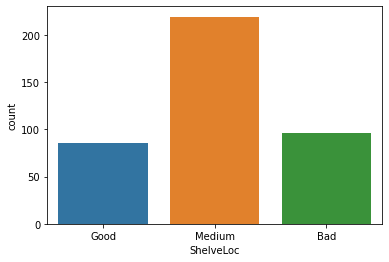

In [32]:
sns.countplot(data[var], order = ['Good','Medium','Bad'])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* Medium 분포가 54%다
* good 보다 bad이 많다.

8) 추가 분석해 볼 사항이 있나요?

### ⑧ Age

In [33]:
var = 'Age'

1) 변수의 비즈니스 의미

* 지역 인구의 평균 연령

2) 숫자, 범주?

* 숫자(이산형 변수)

3) NaN 존재 유무 및 조치방안

In [34]:
data[var].isna().sum()

0

* 결측치 없음

4) 가변수화 필요 여부

* 불필요

5) 기초통계량(수치화)

In [35]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

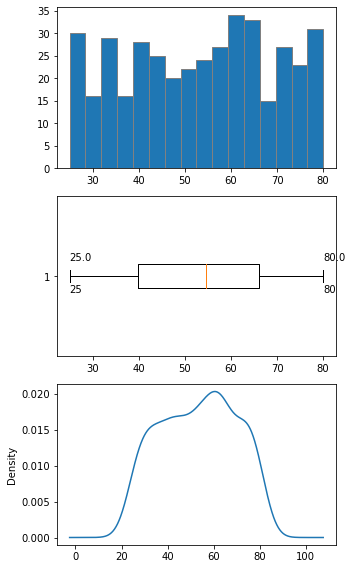

In [36]:
plt.figure(figsize = (5,8))
plt.subplot(3,1,1)
plt.hist(data[var], bins = 16, edgecolor = 'grey')

plt.subplot(3,1,2)
box1 = plt.boxplot(data[var], vert = False)
lower_fence = box1['whiskers'][0].get_xdata()[1]
upper_fense = box1['whiskers'][1].get_xdata()[1]
min_val = data[var].min()
max_val = data[var].max()

plt.text(lower_fence, 1.1, lower_fence)
plt.text(upper_fense, 1.1, upper_fense)

plt.text(min_val, 0.9, min_val)
plt.text(max_val, 0.9, max_val)


plt.subplot(3,1,3)
data[var].plot(kind = 'kde')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 고루 분포되어있다.

8) 추가 분석해 볼 사항이 있나요?

### ⑨ Urban

In [37]:
var = 'Urban'

1) 변수의 비즈니스 의미

* 도심 지역 여부

2) 숫자, 범주?

In [38]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

* 범주 - 'Yes', 'No'

3) NaN 존재 유무 및 조치방안

In [39]:
data[var].isna().sum()

0

* 결측치 없음

4) 가변수화 필요 여부

* 필요

5) 기초통계량(수치화)

In [40]:
data[var].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [41]:
data[var].value_counts() / data[var].shape[0]

Yes    0.705
No     0.295
Name: Urban, dtype: float64

6) 분포 확인(시각화)

C:\Users\inchangson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


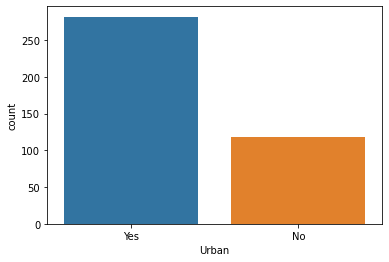

In [42]:
sns.countplot(data[var], order = ['Yes','No'])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 판매가 도심에 집중되어 있다.

8) 추가 분석해 볼 사항이 있나요?

### ⑩ US

In [43]:
var = 'US'

1) 변수의 비즈니스 의미

* 매장이 미국에 있는지

2) 숫자, 범주?

In [44]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

* 범주 Yes, No

3) NaN 존재 유무 및 조치방안

In [45]:
data[var].isna().sum()

0

* 결측치 없음

4) 가변수화 필요 여부

* 필요

5) 기초통계량(수치화)

In [46]:
data[var].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [47]:
data[var].value_counts()/ data[var].shape[0]

Yes    0.645
No     0.355
Name: US, dtype: float64

6) 분포 확인(시각화)

C:\Users\inchangson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


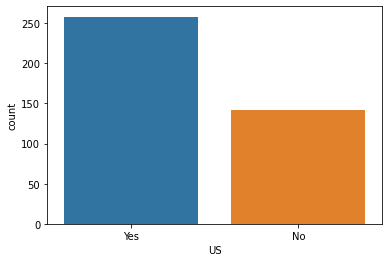

In [48]:
sns.countplot(data[var], order = ['Yes', 'No'])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분 국내(US)에 집중되어 있다.

8) 추가 분석해 볼 사항이 있나요?